#### Preparing our dataset

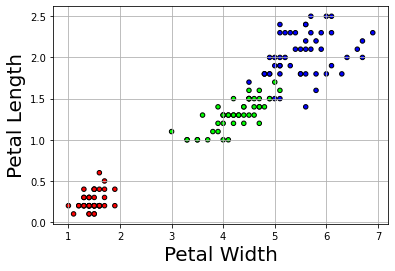

In [18]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.scatter(X[:,2], X[:,3], c=y, cmap=cmap, edgecolors='k', s=20)
plt.ylabel('Petal Length', size=20)
plt.xlabel('Petal Width', size=20)
plt.grid()

#### Implementing the KNN logic

In [31]:
from collections import Counter

def distance(x1, x2):
  '''Returns the euclidean distance between two given arrays/ numbers.'''
  return np.sqrt(np.sum((x1-x2)**2))

class KNN:
  '''Implementing the KNN algorithm in classification.'''
  def __init__(self, k=5):
    self.k = k

  def fit(self, X, y):
    '''Getting the training dataset.'''
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    '''Making predictions for an array/ list of x values.'''
    y_pred = [self._predict(x) for x in X]
    return y_pred

  def _predict(self, x):
    '''Helper function to make predictions for a single data point.'''
    # calculate the distance to each point in train set
    distances = [distance(x, x2) for x2 in self.X_train]

    # Get the closest K neighbors based off computed distance
    k_nearest_indices = np.argsort(distances)[:self.k] # getting the indices of the k nearest training values
    #print(k_nearest_indices)
    k_nearest_labels = [self.y_train[i] for i in k_nearest_indices] #getting the labels of corresponding k nearest indices
    #print(k_nearest_labels)

    # Classify x based off majority vote
    return Counter(k_nearest_labels).most_common()[0][0] # returns the most common key

#### Testing the KNN Classifier

In [36]:
classifier = KNN(k=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)

print(y_pred)
print(y_test)
print(accuracy)

[1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]
[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]
0.9666666666666667


###### Credits: https://www.youtube.com/watch?v=rTEtEy5o3X0